## Import Libraries and load datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
df_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
df_test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")
df_test.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


## task1 a). K-means with k = 10, 7 and 4

* **Since we want to cluster MNIST using K-means algorithm, which is unsupervised algorithm, we will drop labels.**

In [6]:
df_train.drop('label', axis=1, inplace=True)
df_test.drop('label', axis=1, inplace=True)

In [7]:
df_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.isna().sum()

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 784, dtype: int64

In [9]:
df_test.isna().sum()

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 784, dtype: int64

In [10]:
df_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


* **First use k=10**

In [11]:
K = [10, 7, 4]

In [12]:
# u1, u2,....,u10
centroids = np.random.uniform(np.amin(df_train, axis=0), np.amax(df_train, axis=0), size=(K[0], df_train.shape[1]))
centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
centroids.shape

(10, 784)

In [14]:
def cosine_similarity(x, u):
    return np.dot(x, u)/(np.linalg.norm(x)*np.linalg.norm(u))

In [15]:
df_train2 = df_train.copy()
df_train2 = df_train2.to_numpy()

In [18]:
max_itrs = 1000
e = 0.0001
# J = []

for itr in range(max_itrs):
    similarity = cosine_similarity(df_train2, centroids.T)
    clusters = np.argmax(similarity, axis=1)
    new_centroids = np.array([df_train2[clusters==k].mean(axis=0) for k in range(K[0])])
    
    if np.all(np.abs(new_centroids - centroids)<e):
#         centroids = new_centroids
#         for k in range(1, K[0]+1):
#             J.append(np.sum((df_train2 - centroids[clusters]) ** 2))
        break
        
    centroids = new_centroids
                     
# plt.plot(range(1, K[0]+1), J)
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion Measure (J)')
# plt.show()

/tmp/ipykernel_33/965695643.py:8: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([df_train2[clusters==k].mean(axis=0) for k in range(K[0])])


## b). Visualization of the clusters for different K values

**K = 10**

In [21]:
def visualize(y, clusters, k):
    plt.figure(figsize=(6, 6))
    plt.suptitle('Cluster {}'.format(k))
    cluster_indices = np.where(clusters == k)[0]
    for j in range(min(10, len(cluster_indices))):
        plt.subplot(1, 10, j + 1)
        plt.imshow(y[cluster_indices[j]].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()

In [26]:
similarity = cosine_similarity(df_train2, centroids.T)
clusters = np.argmax(similarity, axis=1)
for i in range(1, K[0]):
    visualize(df_train2, clusters, i)

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [27]:
def visualization(x, clusters, centroids, n_samples=10):
    for i in range(K[0]):
        cluster_indices = np.where(clusters == i)[0]
        cluster_center = centroids[i]
        distances = np.dot(x[cluster_indices], cluster_center) / (np.linalg.norm(x[cluster_indices], axis=1) * np.linalg.norm(cluster_center))
        closest_indices = cluster_indices[np.argsort(distances)[-n_samples:]]  # Select the 10 closest data points
        plt.figure(figsize=(10, 2))
        for j, index in enumerate(closest_indices):
            plt.subplot(1, n_samples, j + 1)
            plt.imshow(x[index].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

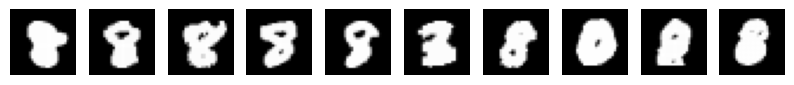

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

In [28]:
visualization(df_train2, clusters, centroids, n_samples=10)

The very first visualization is clustering 8 with a good accuracy.

**K = 7**

In [ ]:
centroids_ = np.random.uniform(np.amin(df_train, axis=0), np.amax(df_train, axis=0), size=(K[0], df_train.shape[1]))
max_itrs = 1000
e = 0.0001
# J = []

for itr in range(max_itrs):
    similarity = cosine_similarity(df_train2, centroids_.T)
    clusters = np.argmax(similarity, axis=1)
    new_centroids = np.array([df_train2[clusters==k].mean(axis=0) for k in range(K[1])])
    
    if np.all(np.abs(new_centroids - centroids_)<e):
#         centroids_ = new_centroids
#         for k in range(1, K[0]+1):
#             J.append(np.sum((df_train2 - centroids_[clusters]) ** 2))
        break
        
    centroids_ = new_centroids
                     
# plt.plot(range(1, K[0]+1), J)
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion Measure (J)')
# plt.show()

In [ ]:
def visualization(x, clusters, centroids_, n_samples=10):
    for i in range(K[0]):
        cluster_indices = np.where(clusters == i)[0]
        cluster_center = centroids_[i]
        distances = np.dot(x[cluster_indices], cluster_center) / (np.linalg.norm(x[cluster_indices], axis=1) * np.linalg.norm(cluster_center))
        closest_indices = cluster_indices[np.argsort(distances)[-n_samples:]]  # Select the 10 closest data points
        plt.figure(figsize=(10, 2))
        for j, index in enumerate(closest_indices):
            plt.subplot(1, n_samples, j + 1)
            plt.imshow(x[index].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

In [ ]:
similarity = cosine_similarity(df_train2, centroids_.T)
clusters = np.argmax(similarity, axis=1)

In [ ]:
visualization(df_train2, clusters, centroids_, n_samples=10)

**K = 4**

In [ ]:
centroids__ = np.random.uniform(np.amin(df_train, axis=0), np.amax(df_train, axis=0), size=(K[0], df_train.shape[1]))
max_itrs = 1000
e = 0.0001
# J = []

for itr in range(max_itrs):
    similarity = cosine_similarity(df_train2, centroids__.T)
    clusters = np.argmax(similarity, axis=1)
    new_centroids = np.array([df_train2[clusters==k].mean(axis=0) for k in range(K[2])])
    
    if np.all(np.abs(new_centroids - centroids__)<e):
#         centroids__ = new_centroids
#         for k in range(1, K[0]+1):
#             J.append(np.sum((df_train2 - centroids__[clusters]) ** 2))
        break
        
    centroids__ = new_centroids
                     
# plt.plot(range(1, K[0]+1), J)
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion Measure (J)')
# plt.show()

In [ ]:
def visualization(x, clusters, centroids__, n_samples=10):
    for i in range(K[0]):
        cluster_indices = np.where(clusters == i)[0]
        cluster_center = centroids__[i]
        distances = np.dot(x[cluster_indices], cluster_center) / (np.linalg.norm(x[cluster_indices], axis=1) * np.linalg.norm(cluster_center))
        closest_indices = cluster_indices[np.argsort(distances)[-n_samples:]]  # Select the 10 closest data points
        plt.figure(figsize=(10, 2))
        for j, index in enumerate(closest_indices):
            plt.subplot(1, n_samples, j + 1)
            plt.imshow(x[index].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

In [ ]:
similarity = cosine_similarity(df_train2, centroids__.T)
clusters = np.argmax(similarity, axis=1)
visualization(df_train2, clusters, centroids__, n_samples=10)